### Measuring the correlation between categorical variables Provider Tenure and  Medication Given

This notebook analyzes and describes relationship that exists( or not) between provider tenure and EMS treatment(Medication Given) to the patient. The script reads the intermediate dataset -- 'MedicationsPatients' preapared by our team based on datasets provided by our project partner.

In this classification situation, catogorical target variable 'Medication_Given' and categorical predicator 'Provider's Tenure'(in months), are analyzed and the strength of relationship between them is measured using <B>Chi-square test<B>.

<b>Chi-square Test of Independence:<b>
<p>The chi-square test of independence is used to determine whether there is an association between two or more categorical variables. In our case, we would like to test whether the Tenure of the provider has any association with Medication they administered.

##### This note book uses Intermediate Datasets -- MedicationsPatients for analytics

In [1]:
# import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, time

In [2]:
print(os.getcwd())
readStart=time.time()

## Reading dataset
columnsToUse=['PatientId','PatientGender','PatientGenderCode',
            'FRDPersonnelID','FRDPersonnelGender','ProviderGenderCode',
            'Medication_Given_RXCUI_Code','Medication_Given_Description','TenureMonths']

dfMedPatient = pd.read_csv ('../data/02_intermediate/MedicationsPatients-20210225-ems-raw-v04.csv',usecols=columnsToUse)[columnsToUse]

# Stop the clock and calculate read time
readStop=time.time()
readTime=readStop-readStart
readMin=np.floor(readTime/60)
readSec=np.floor(readTime-(readMin*60))
print("The file was read in {0:.0f} minutes and {1:.0f} seconds.".format(readMin,readSec))

print(dfMedPatient.shape)

c:\github_anup\ems-analytics\notebooks
The file was read in 0 minutes and 0 seconds.
(62881, 9)


In [3]:
# list the columns in the dataframe
dfMedPatient.columns

Index(['PatientId', 'PatientGender', 'PatientGenderCode', 'FRDPersonnelID',
       'FRDPersonnelGender', 'ProviderGenderCode',
       'Medication_Given_RXCUI_Code', 'Medication_Given_Description',
       'TenureMonths'],
      dtype='object')

In [4]:
#Confirming Given Medication Names
print('Medication Given( Unique ) =\n '+str(dfMedPatient.Medication_Given_Description.unique()))

Medication Given( Unique ) =
 ['Oxygen' 'Ondansetron (Zofran)' 'Normal saline'
 'Acetylsalicylic Acid (Aspirin, ASA) ' 'Fentanyl Citrate (Sublimaze) '
 'Nitroglycerin' 'Sodium Bicarbonate (8.4%) ' 'Dextrose 50 % (D50)'
 'Ipratropium Bromide(Atrovent)' 'Albuterol (Ventolin) '
 'Dextrose 10 % (D10)' 'Naloxone (Narcan)' 'Midazolam (Versed)'
 'Ketamine (Ketalar)' 'Diphenhydramine (Benadryl)'
 'Methylprednisolone (Solu-Medrol) ' 'Magnesium Sulfate (50%) '
 'Glucose (Oral)' 'Epinephrine 0.1 MG/ML (1:10,000)'
 'Amiodarone (Cordarone)' 'Glucagon (Glucagen)'
 'Morphine (Morphine Sulfate) ' 'Atropine (Atropine Sulfate) '
 'Adenosine (Adenocard)' 'Epinephrine 1 MG/ML (1:1,000)'
 'Lidocaine (2%) (Xylocaine) ' 'Tranexamic Acid (TXA)' nan
 'Cyanokit (Hydroxocobalamin)' 'Norepinephrine (Levophed)'
 'Calcium Chloride (10%) ' 'Tetracaine'
 'Sodium Bicarbonate (4.2%) (Infant)']


In [5]:
#Checking Medication Given Description count
print('Medication Given Description Count = '+str(dfMedPatient.Medication_Given_Description.nunique()))
##dfMedPatient.Medication_Given_Description.nunique()

Medication Given Description Count = 32


In [6]:
#Confirming unique Medication_Given_RXCUI_Code count
print('Medication_Given_RXCUI_Code Count = '+str(dfMedPatient.Medication_Given_RXCUI_Code.nunique()))

Medication_Given_RXCUI_Code Count = 32


Confirmed that the unique Medication_Given_Description coun matches the Medication_Given_RXCUI_Code count of <b>32.</b>

In [7]:
#Confirming Tenure Months(unique) in sorted order
print('Tenure Months list =\n '+str(dfMedPatient.TenureMonths.sort_values().unique()))
##dfMedPatient.TenureMonths.sort_values().unique()

Tenure Months list =
 [-20 -11   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 

In [8]:
#Show number of unique values per column
dfMedPatient.nunique(dropna=False)

PatientId                       38389
PatientGender                       4
PatientGenderCode                   4
FRDPersonnelID                    844
FRDPersonnelGender                  2
ProviderGenderCode                  2
Medication_Given_RXCUI_Code        33
Medication_Given_Description       33
TenureMonths                      420
dtype: int64

In [9]:
#Show number of nulls per column
dfMedPatient.isnull().sum()

PatientId                        0
PatientGender                   32
PatientGenderCode                0
FRDPersonnelID                   0
FRDPersonnelGender               0
ProviderGenderCode               0
Medication_Given_RXCUI_Code      6
Medication_Given_Description     6
TenureMonths                     0
dtype: int64

Dispalying Time Traveler - Providers ( TenureMonths in future (<0 months) )

In [18]:
# showing dfMedPatient for those records that have a negative tenure ( time travellers)
dfMedPatient[(dfMedPatient['TenureMonths'] < 0)]

,PatientId,PatientGender,PatientGenderCode,FRDPersonnelID,FRDPersonnelGender,ProviderGenderCode,Medication_Given_RXCUI_Code,Medication_Given_Description,TenureMonths
4207,547276,Male,2,6FB584B8-F37D-45E3-8FCC-C820ACF46816,Male,2,7806.0,Oxygen,-20
16830,754276,Male,2,86D2C99E-9E01-E211-B5F5-78E7D18CFD3C,Female,1,7806.0,Oxygen,-11


### Reduce Data

In [34]:
#Remove -ve Tenure for PatientProvider ( Removing time traveller records)
dfMedPatientReduced = dfMedPatient[(dfMedPatient['TenureMonths'] >= 0)]

#Calculate percentage of dataset remaining
ratio=len(dfMedPatientReduced)/len(dfMedPatient)*100
print("%.4f%% remaining!" % ratio)

99.9968% remaining!


In [21]:
# Cross tabulation between  TenureMonths and Medications from 'dfMedPatientReduced' datarframe  -- Keeping this code line from -cross-validation/checking----
CrosstabResult=pd.crosstab(index=dfMedPatientReduced['TenureMonths'],columns=dfMedPatientReduced['Medication_Given_Description'])
##print(CrosstabResult)

Chi-square Test in Python can be done using the chi2_contingency() function from the scipy.stats module.

In [14]:
# importing the required function
from scipy.stats import chi2_contingency

In [22]:
# Cross tabulation between TenureMonths and Medications from 'dfMedPatientReduced' datarframe 
pd.crosstab(dfMedPatientReduced.Medication_Given_Description,dfMedPatientReduced.TenureMonths)

TenureMonths,3,5,6,7,8,9,10,11,12,13,...,414,415,416,418,419,420,430,436,437,440
Medication_Given_Description,,,,,,,,,,,,,,,,,,,,,
"Acetylsalicylic Acid (Aspirin, ASA)",0,0,6,2,7,3,11,11,6,10,...,0,1,2,0,0,0,0,0,0,0
Adenosine (Adenocard),0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
Albuterol (Ventolin),0,0,2,0,1,6,11,14,6,8,...,0,0,0,0,0,0,0,0,0,0
Amiodarone (Cordarone),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atropine (Atropine Sulfate),0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
Calcium Chloride (10%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyanokit (Hydroxocobalamin),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dextrose 10 % (D10),0,0,0,1,0,2,2,3,5,2,...,0,0,0,0,0,0,0,0,0,0
Dextrose 50 % (D50),0,0,0,1,0,1,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0


Chi-square test finds the probability of a Null hypothesis(H0).

 - Assumption(H0): The two variables are NOT related to each other
 - Result of Chi-Sq Test: if the Probability of H0 being True, The two variables are NOT related to each other
<p>It can help us to understand whether both the categorical variables are correlated with each other or not.

In [23]:
## Performing Chi-sq test, to test the association between two variables, using the cross tab sequence
ChiSquareResult=chi2_contingency(pd.crosstab( dfMedPatientReduced.TenureMonths, dfMedPatientReduced.Medication_Given_Description))

In [24]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSquare Test is:', ChiSquareResult[1])

The P-Value of the ChiSquare Test is: 4.5781793145246635e-174


As evident, the <b>p-value is less than 0.05 </b>, hence we <b>reject the Null Hypothesis(H0) that the 'TenureMonths' of the Providers are not associated with the 'Medication_Given'</b>

As the P-value came lower than 0.05 in our result, hence H0 will not be accepted, which means the <b>variables 'TenureMonths' and 'Medication_Given' are correlated  to each other</b>. This is based on if two variables are correlated, then the P-value will come very close to zero, which in our case is : <b>2.9173204505061524e-170</b>

Now, further investigation on relationship between the provider's TenureMonths and Medications Given follows :........

Create a pivot-like dataframe using tenure, Medication Code and  Medication Description to get a Medication Given count break down by tenure and medication.

In [55]:
## Creating pivot dataframe from'dfMedPatientReduced' 
dfMedPatientReduced_pvt = dfMedPatientReduced.groupby(['TenureMonths',
                                    'Medication_Given_RXCUI_Code',
                                    'Medication_Given_Description']).size().to_frame(name='Medication_Count').reset_index()

dfMedPatientReduced_pvt.shape

(6416, 4)

<b>What are the top 10 Medication Given overall? </b>

In [56]:
dfMedPatientReduced_pvt.groupby(['Medication_Given_RXCUI_Code',
                          'Medication_Given_Description'])[['Medication_Count']].sum().nlargest(10,['Medication_Count'])

,,Medication_Count
Medication_Given_RXCUI_Code,Medication_Given_Description,
7806.0,Oxygen,10705
125464.0,Normal saline,7552
26225.0,Ondansetron (Zofran),6855
4337.0,Fentanyl Citrate (Sublimaze),6577
317361.0,"Epinephrine 0.1 MG/ML (1:10,000)",6189
1191.0,"Acetylsalicylic Acid (Aspirin, ASA)",4349
435.0,Albuterol (Ventolin),3837
7213.0,Ipratropium Bromide(Atrovent),2817
4917.0,Nitroglycerin,2721


<b> Removing data where Medication_Given_Description = 'Oxygen' and 'Normal saline' from dfMedPatientReduced dataframe, before 2nd round of Chi-Square Test  </b>

In [62]:
#Remove 'oxygen' for 'Medication_Given_Description'
dfMedPatientReduced_NoOxy=dfMedPatientReduced.loc[dfMedPatientReduced['Medication_Given_Description']!='Oxygen',:]

#size of remaining dataset 
len(dfMedPatientReduced_NoOxy)

52174

In [63]:
#Remove 'Normal saline' for 'Medication_Given_Description'
dfMedPatientReduced_NoOxySaline=dfMedPatientReduced_NoOxy.loc[dfMedPatientReduced_NoOxy['Medication_Given_Description']!='Normal saline',:]

#size of remaining dataset 
len(dfMedPatientReduced_NoOxySaline)

44622

In [67]:
# Now again creating Cross tabulation between TenureMonths and Medications from 'dfMedPatientReduced_NoOxySaline' datarframe 
pd.crosstab(dfMedPatientReduced_NoOxySaline.Medication_Given_Description,dfMedPatientReduced_NoOxySaline.TenureMonths)

TenureMonths,5,6,7,8,9,10,11,12,13,14,...,409,410,411,412,413,415,416,420,436,437
Medication_Given_Description,,,,,,,,,,,,,,,,,,,,,
"Acetylsalicylic Acid (Aspirin, ASA)",0,6,2,7,3,11,11,6,10,2,...,0,1,1,0,0,1,2,0,0,0
Adenosine (Adenocard),0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Albuterol (Ventolin),0,2,0,1,6,11,14,6,8,2,...,0,1,1,0,0,0,0,0,0,0
Amiodarone (Cordarone),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atropine (Atropine Sulfate),0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
Calcium Chloride (10%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyanokit (Hydroxocobalamin),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dextrose 10 % (D10),0,0,1,0,2,2,3,5,2,0,...,1,1,1,0,1,0,0,0,0,0
Dextrose 50 % (D50),0,0,1,0,1,1,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
## Now Performing Chi-sq test, without 'oxygen' and 'Normal saline' to test the association between two variables, using the cross tab sequence
ChiSquareResult_NoOxySaline=chi2_contingency(pd.crosstab(dfMedPatientReduced_NoOxySaline.TenureMonths, dfMedPatientReduced_NoOxySaline.Medication_Given_Description))

In [66]:
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSquare Test is:', ChiSquareResult_NoOxySaline[1])

The P-Value of the ChiSquare Test is: 2.087219785131194e-131


Again, we see the <b>p-value is less than 0.05 </b>, hence we <b>reject the Null Hypothesis(H0) that the 'TenureMonths' of the Providers are not associated with the 'Medication_Given'</b>

<b>Using dfMedPatientReduced_pvt for further analysis</b>

In [71]:
## Changing 'Medication_Given_RXCUI_Code' from Numerical(float) to int64 for consistency
dfMedPatientReduced_pvt['Medication_Given_RXCUI_Code'] = dfMedPatientReduced_pvt['Medication_Given_RXCUI_Code'].apply(np.int64) 

In [72]:
## Lowest 3 tenure months Medication given, count break down by tenuremonths
dfMedPatientReduced_pvt.head(3)

,TenureMonths,Medication_Given_RXCUI_Code,Medication_Given_Description,Medication_Count
0,3,7806,Oxygen,1
1,5,7242,Naloxone (Narcan),1
2,5,7806,Oxygen,5


In [73]:
## Top 3 tenuremonths for Medication given, count break down by tenuremonths
dfMedPatientReduced_pvt.tail(3)

,TenureMonths,Medication_Given_RXCUI_Code,Medication_Given_Description,Medication_Count
6413,436,7242,Naloxone (Narcan),2
6414,437,4337,Fentanyl Citrate (Sublimaze),1
6415,440,7806,Oxygen,1


Generate a hex bin plot using tenure, medication given code, and medication count from dfMedPatient_pvt as the x, y and C values, respectively.

<function matplotlib.pyplot.show(close=None, block=None)>

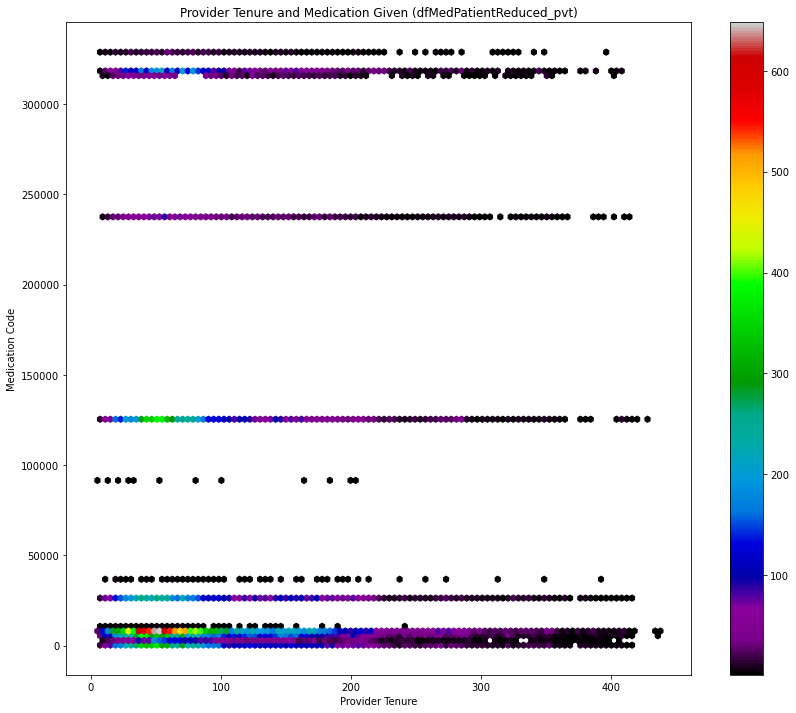

In [80]:
# in order to get the medication given code to show in the y-axis, need to format the values as strings instead of numbers
hb = dfMedPatientReduced_pvt.plot.hexbin(
                       x='TenureMonths', 
                       y='Medication_Given_RXCUI_Code', 
                       C='Medication_Count',
                       reduce_C_function=np.sum,
                       gridsize=110,
                       cmap="nipy_spectral",
                       xlabel="Provider Tenure",
                       ylabel="Medication Code",
                       title="Provider Tenure and Medication Given (dfMedPatientReduced_pvt)",
                       figsize=(14,12),
                       sharex=False
)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))
plt.show

The hex bin plots of dfMedPatientReduced_pvt shows the use of 3 attributes from the dataframe. Using x, y, and C means that the reduce_C_function now comes into play and it is the reason for all of the white showing - it is where there is no sum to show.

Using dfMedPatientReduced_pvt, generate descriptive statistics about the tenure, medicine count, and medication given description attributes.

In [81]:
dfMedPatientReduced_pvt[['TenureMonths','Medication_Count']].describe()

,TenureMonths,Medication_Count
count,6416.000000,6416.000000
mean,165.988310,9.799408
std,105.425829,14.871184
min,3.000000,1.000000
25%,76.000000,2.000000
50%,152.000000,4.000000
75%,245.000000,11.000000
max,440.000000,130.000000


In [82]:
dfMedPatientReduced_pvt[['Medication_Given_Description']].describe(include='all')

,Medication_Given_Description
count,6416
unique,32
top,Oxygen
freq,392


Generate histograms of the tenure and medication given using all records to see frequency from dfMedPatient_pvt

array([[<AxesSubplot:title={'center':'TenureMonths'}>]], dtype=object)

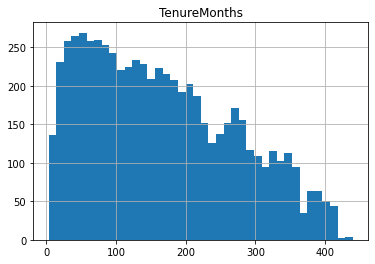

In [83]:
## histogram of the tenure
dfMedPatientReduced_pvt.hist(column='TenureMonths',bins=40)

array([[<AxesSubplot:title={'center':'Medication_Given_RXCUI_Code'}>]],
      dtype=object)

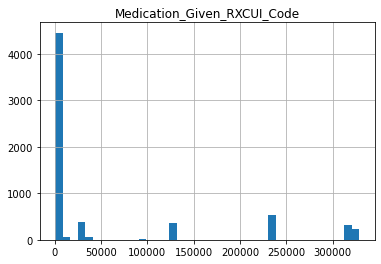

In [84]:
## Similarly histogram of the 'Medication_Given_RXCUI_Code'
dfMedPatientReduced_pvt.hist(column='Medication_Given_RXCUI_Code', bins=40)

array([[<AxesSubplot:title={'center':'Medication_Count'}>]], dtype=object)

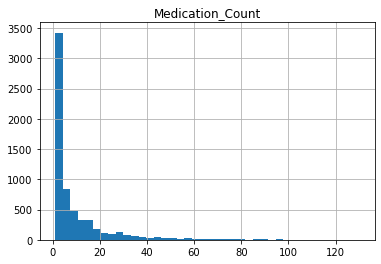

In [85]:
## !! Check, if this is valid !!! histogram of the 'Medication_Count' (by tenure)
dfMedPatientReduced_pvt.hist(column='Medication_Count', bins=40)

It has been determined that there are some "time traveler" tenure values - records where the porvider start date is after the dispatch date resulting in a negative value for the calculated provider tenure.

Going to drop the "time traveler" (negative tenure) rows and rerun the hexbin plot and desriptive statistics

In [88]:
# shape of dfMedPatient_pvt that contains all records, including "time traveler" before deletion
dfMedPatientReduced_pvt.shape

(6416, 4)

In [89]:
# create the dfPatProc_pvt2 dataframe by only including those records that have a positive tenure
dfMedPatient_pvt2 = dfMedPatientReduced_pvt[(dfMedPatient_pvt['TenureMonths'] >= 0)]

dfMedPatient_pvt2.shape

<ipython-input-89-d15519d6218e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfMedPatient_pvt2 = dfMedPatientReduced_pvt[(dfMedPatient_pvt['TenureMonths'] >= 0)]


(6414, 4)

Now comparing the two shape sizes, it can be seen that there were 2 "time traveler" rows for medication given
<p> Now, recreating the hexbin plot.

<function matplotlib.pyplot.show(close=None, block=None)>

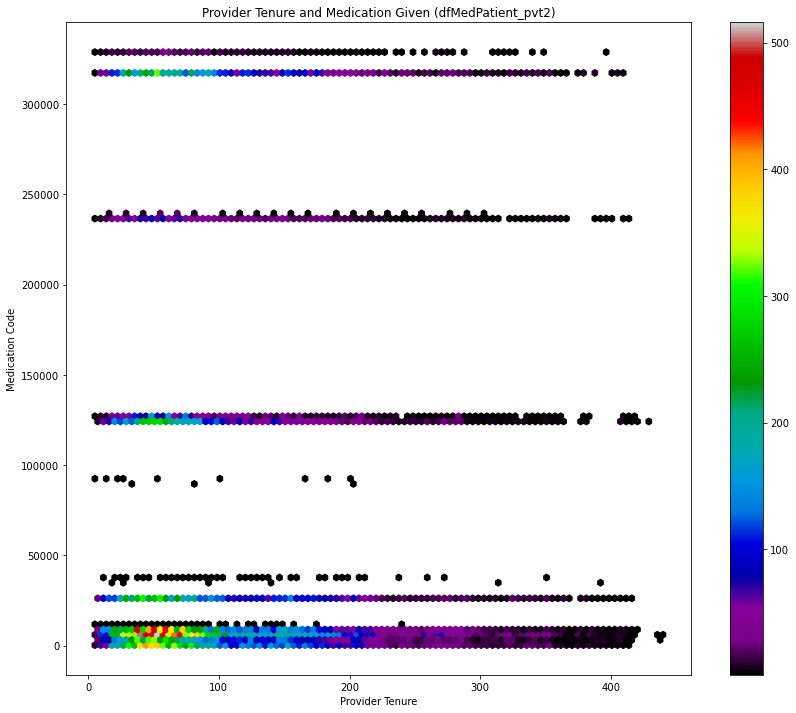

In [90]:
# in order to get the medication given code to show in the y-axis, need to format the values as strings instead of numbers
hb = dfMedPatient_pvt2.plot.hexbin(
                       x='TenureMonths', 
                       y='Medication_Given_RXCUI_Code', 
                       C='Medication_Count',
                       reduce_C_function=np.sum,
                       gridsize=100,
                       cmap="nipy_spectral",
                       xlabel="Provider Tenure",
                       ylabel="Medication Code",
                       title="Provider Tenure and Medication Given (dfMedPatient_pvt2)",
                       figsize=(14,12),
                       sharex=False
)

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}'))

plt.show

<b>What are the top 10 Medication Given overall? </b>

In [91]:
dfMedPatient_pvt2.groupby(['Medication_Given_RXCUI_Code',
                          'Medication_Given_Description'])[['Medication_Count']].sum().nlargest(10,['Medication_Count'])

,,Medication_Count
Medication_Given_RXCUI_Code,Medication_Given_Description,
7806,Oxygen,10704
125464,Normal saline,7552
26225,Ondansetron (Zofran),6855
4337,Fentanyl Citrate (Sublimaze),6577
317361,"Epinephrine 0.1 MG/ML (1:10,000)",6189
1191,"Acetylsalicylic Acid (Aspirin, ASA)",4349
435,Albuterol (Ventolin),3837
7213,Ipratropium Bromide(Atrovent),2817
4917,Nitroglycerin,2721


Based on the tenure histogram, the highest tenure count  falls between the 50 month and 200 month value. Now going to look at provider tenure values less than or equal to 200 months to see what can be found around these "high" range.

In [92]:
# how many records from dfPatProc_pvt2 will be used limiting the tenure to 100 months or less
dfMedPatient_pvt2[(dfMedPatient_pvt2['TenureMonths'] <= 200)].shape

(4140, 4)

Generate the respective descriptive statistics and histograms.

In [93]:
dfMedPatient_pvt2[(dfMedPatient_pvt2['TenureMonths'] <= 200)][['TenureMonths','Medication_Count']].describe()

,TenureMonths,Medication_Count
count,4140.000000,4140.000000
mean,99.921739,13.373913
std,54.839018,17.323989
min,5.000000,1.000000
25%,53.000000,2.000000
50%,97.000000,6.000000
75%,147.000000,17.000000
max,200.000000,130.000000


In [94]:
dfMedPatient_pvt2[(dfMedPatient_pvt2['TenureMonths'] <= 200)][['Medication_Given_Description']].describe(include='all')

,Medication_Given_Description
count,4140
unique,32
top,Oxygen
freq,196


array([[<AxesSubplot:title={'center':'Medication_Given_RXCUI_Code'}>]],
      dtype=object)

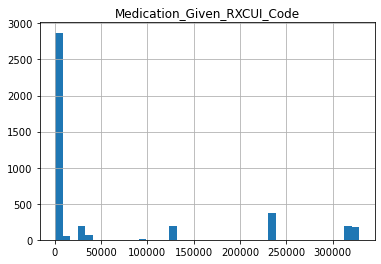

In [95]:
dfMedPatient_pvt2[(dfMedPatient_pvt2['TenureMonths'] <= 200)].hist(column='Medication_Given_RXCUI_Code', bins=40)


A comparison of the medication given histograms for all dfMedPatient_pvt2 rows and the subset limited to tenure of 200 months or less shows the distribution of medication given is similar.

<b> What are the top 10 procedures by count for medication given by providers with 200 or less months of tenure? </b>

In [96]:
dfMedPatient_pvt2[(dfMedPatient_pvt2['TenureMonths'] <= 200)].groupby(['Medication_Given_RXCUI_Code',
     'Medication_Given_Description'])[['Medication_Count']].sum().nlargest(10,['Medication_Count'])

,,Medication_Count
Medication_Given_RXCUI_Code,Medication_Given_Description,
7806,Oxygen,9369
125464,Normal saline,6820
26225,Ondansetron (Zofran),6094
4337,Fentanyl Citrate (Sublimaze),5693
317361,"Epinephrine 0.1 MG/ML (1:10,000)",5475
1191,"Acetylsalicylic Acid (Aspirin, ASA)",3826
435,Albuterol (Ventolin),3374
7213,Ipratropium Bromide(Atrovent),2466
4917,Nitroglycerin,2310


The mean of the tenure values for those providers with 200 months or less, is <b>99.87 </b> months.

<b>What are the top 10 procedures by count for procedures performed by providers with 98 or 100 months (mean = 99.87) of tenure? </b>

In [97]:
dfMedPatient_pvt2[(dfMedPatient_pvt2['TenureMonths'] > 98) & (dfMedPatient_pvt2['TenureMonths'] <= 100)].groupby(['Medication_Given_RXCUI_Code',
     'Medication_Given_Description'])[['Medication_Count']].sum().nlargest(10,['Medication_Count'])

,,Medication_Count
Medication_Given_RXCUI_Code,Medication_Given_Description,
7806,Oxygen,116
125464,Normal saline,65
4337,Fentanyl Citrate (Sublimaze),64
26225,Ondansetron (Zofran),63
317361,"Epinephrine 0.1 MG/ML (1:10,000)",44
1191,"Acetylsalicylic Acid (Aspirin, ASA)",41
7242,Naloxone (Narcan),25
435,Albuterol (Ventolin),23
4917,Nitroglycerin,17
